# Trees and Calibration

## The Dataset
Credit ([Link](https://www.kaggle.com/gamersclub/brazilian-csgo-plataform-dataset-by-gamers-club?select=tb_lobby_stats_player.csv) | [License](https://creativecommons.org/licenses/by-nc-sa/4.0/))

The goal is to predict wins based on in match performace of multiple players. Please use this dataset and this task for all parts of the assignment.

### Features

idLobbyGame - Categorical (The Lobby ID for the game)

idPlayer - Categorical (The ID of the player)

idRooom - Categorical (The ID of the room)

qtKill - Numerical (Number of kills)

qtAssist - Numerical (Number of Assists)

qtDeath - Numerical (Number of Deaths)

qtHs - Numerical (Number of kills by head shot)

qtBombeDefuse - Numerical (Number of Bombs Defuses)

qtBombePlant - Numerical (Number of Bomb plants)

qtTk - Numerical (Number of Team kills)

qtTkAssist - Numerical Number of team kills assists)

qt1Kill - Numerical (Number of rounds with one kill)

qt2Kill - Numerical (Number of rounds with two kill)

qt3Kill - Numerical (Number of rounds with three kill)

qt4Kill - Numerical (Number of rounds with four kill)

qt5Kill - Numerical (Number of rounds with five kill)

qtPlusKill - Numerical (Number of rounds with more than one kill)

qtFirstKill - Numerical (Number of rounds with first kill)

vlDamage - Numerical (Total match Damage)

qtHits - Numerical (Total match hits)

qtShots - Numerical (Total match shots)

qtLastAlive - Numerical (Number of rounds being last alive)

qtClutchWon - Numerical (Number of total clutchs wons)

qtRoundsPlayed - Numerical (Number of total Rounds Played)

descMapName - Categorical (Map Name - de_mirage, de_inferno, de_dust2, de_vertigo, de_overpass, de_nuke, de_train, de_ancient)

vlLevel - Numerical (GC Level)

qtSurvived - Numerical (Number of rounds survived)

qtTrade - Numerical (Number of trade kills)

qtFlashAssist - Numerical (Number of flashbang assists)

qtHitHeadshot - Numerical (Number of times the player hit headshot

qtHitChest - Numerical (Number of times the player hit chest)

qtHitStomach - Numerical (Number of times the player hit stomach)

qtHitLeftAtm - Numerical (Number of times the player hit left arm)

qtHitRightArm - Numerical (Number of times the player hit right arm)

qtHitLeftLeg - Numerical (Number of times the player hit left leg)

qtHitRightLeg - Numerical (Number of times the player hit right leg)

flWinner - Winner Flag (**Target Variable**).

dtCreatedAt - Date at which this current row was added. (Date)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

In [2]:
# suppress warnings
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
warnings.filterwarnings('ignore')

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [3]:
cs_go_df = pd.read_csv('tb_lobby_stats_player.csv')
cs_go_df

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,...,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,...,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,...,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,...,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,...,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184147,172907,2716,178496,21,3,13,5,1,1,0.0,...,0.0,7.0,42.0,26.0,1.0,4.0,6.0,2.0,1,2021-11-27 16:47:57
184148,172908,2716,178497,15,1,22,5,0,1,0.0,...,0.0,5.0,21.0,21.0,3.0,7.0,2.0,4.0,1,2021-12-10 01:08:48
184149,172909,2716,178498,9,6,23,2,0,3,0.0,...,0.0,3.0,25.0,12.0,1.0,5.0,6.0,7.0,0,2022-01-09 21:01:10
184150,172910,2716,178499,15,5,20,6,0,2,0.0,...,1.0,8.0,22.0,16.0,2.0,8.0,3.0,6.0,0,2022-01-14 17:42:37


**1.2: Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping - you must remove the dtCreatedAt column)**

In [4]:
cs_go_df = cs_go_df.drop(columns=['dtCreatedAt', 'idLobbyGame', 'idPlayer', 'idRoom'])

In [5]:
missing = []
missing_cols = []
for col in cs_go_df.columns:
    missing_val = cs_go_df[col].isna().sum()/ cs_go_df.shape[0] *100
    if missing_val > 0:
        missing_cols.append(col)
        missing.append(missing_val)

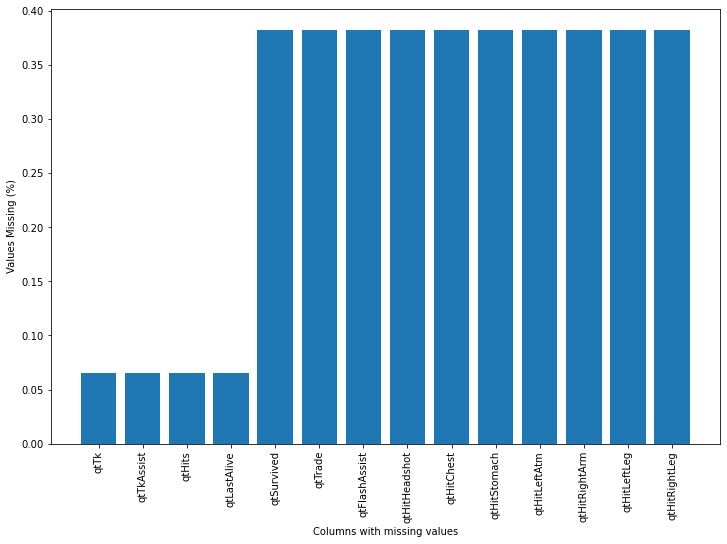

In [6]:
plt.figure(figsize=(12,8))
plt.bar(x=missing_cols, height= missing)
plt.xlabel("Columns with missing values")
plt.ylabel("Values Missing (%)")
plt.tick_params(axis = 'x', rotation=90);

In [7]:
cs_go_df.dropna(inplace=True)
cs_go_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183447 entries, 0 to 184151
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   qtKill          183447 non-null  int64  
 1   qtAssist        183447 non-null  int64  
 2   qtDeath         183447 non-null  int64  
 3   qtHs            183447 non-null  int64  
 4   qtBombeDefuse   183447 non-null  int64  
 5   qtBombePlant    183447 non-null  int64  
 6   qtTk            183447 non-null  float64
 7   qtTkAssist      183447 non-null  float64
 8   qt1Kill         183447 non-null  int64  
 9   qt2Kill         183447 non-null  int64  
 10  qt3Kill         183447 non-null  int64  
 11  qt4Kill         183447 non-null  int64  
 12  qt5Kill         183447 non-null  int64  
 13  qtPlusKill      183447 non-null  int64  
 14  qtFirstKill     183447 non-null  int64  
 15  vlDamage        183447 non-null  int64  
 16  qtHits          183447 non-null  float64
 17  qtShots   

**I have droppped the ID columns ('idLobbyGame', 'idPlayer', 'idRoom') as they are not contribute to the outcome of the game. As mentioned in the question, I have also dropped 'dtCreatedAt'. Since the missing values in the columns are very small(less than 0.4% for all) I have not dropped these columns, and dropped the rows with missing value instead. After dropping the null value rows, we still have more than sufficient data to train the model.**

**1.3: Plot side-by-siide bars of class distribtuion for each category for the categorical feature and the target categories.**

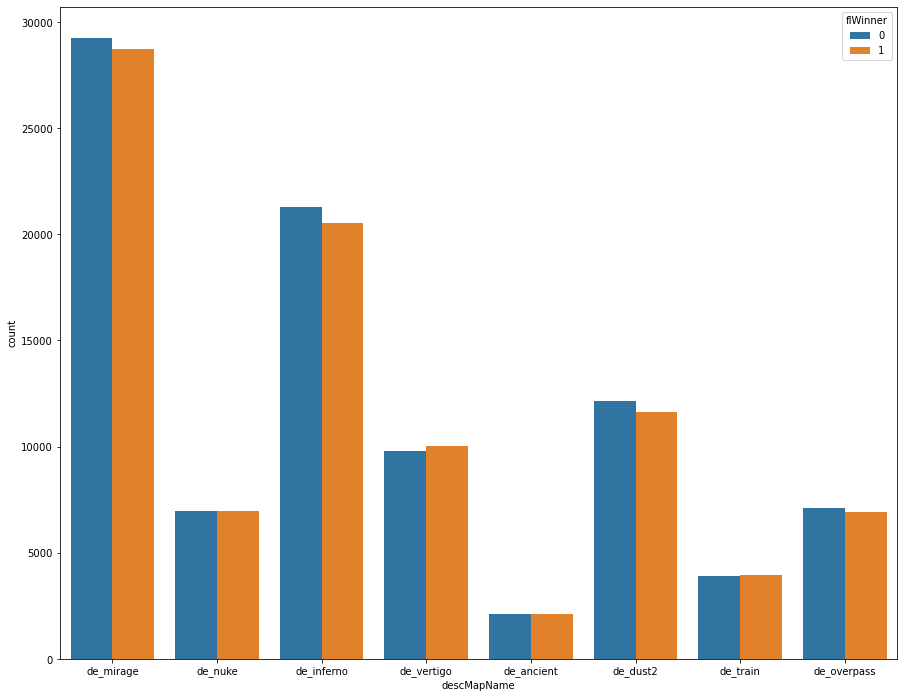

In [8]:
plt.figure(figsize=(15,12))
ax = sns.countplot(data=cs_go_df, x = 'descMapName', hue='flWinner')
plt.show()

#map_feat = cs_go_df.groupby(['descMapName','flWinner']).size().reset_index(name='count')
#sns.barplot(x='descMapName', y='count', hue='flWinner', data=map_feat, ax=ax)
#plt.tick_params(axis='x', rotation=90)

**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

In [9]:
# Checking the count of label
cs_go_df['flWinner'].value_counts(1)

0    0.504702
1    0.495298
Name: flWinner, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

cs_go_X = cs_go_df.drop(columns=['flWinner'])
cs_go_y = cs_go_df['flWinner']

cs_go_X_dev, cs_go_X_test, cs_go_y_dev, cs_go_y_test = train_test_split(cs_go_X, cs_go_y, test_size=0.2)

**We can see that the dataset has a balanced class distribution, so I have used train_test_split from sklearn to split the dataframe into development and test dataset.**

**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**

In [11]:
categorical_features = ['descMapName']
num_features = np.array(cs_go_X.columns)
indx = np.argwhere(num_features=='descMapName')
num_features = np.delete(num_features, indx)

preprocess = make_column_transformer((StandardScaler(), np.array(num_features)), 
                                     (OneHotEncoder(handle_unknown='ignore'), np.array(categorical_features)))

**I have used a StandardScaler, as I noticed that the model performed slightly better with a scaler. Scaling also makes the visualisation and interpretation of the model more convenient.**

**However, decision tree and ensemble methods do not require necessarily feature scaling to be performed as they are not sensitive to the the variance in the data.**

**1.6: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

In [12]:
decision_tree_pipe = make_pipeline(preprocess, DecisionTreeClassifier())
decision_tree_pipe.fit(cs_go_X_dev, cs_go_y_dev)

print("Accuracy on development set: ", decision_tree_pipe.score(cs_go_X_dev, cs_go_y_dev))
print("Accuracy on test set: ", decision_tree_pipe.score(cs_go_X_test, cs_go_y_test))

Accuracy on development set:  1.0
Accuracy on test set:  0.7227582447533388


**Here the accuracy scores on the development and test data help us understand the performance of the tree. We can see the models accuracy on the development data set is 1, which indicates that it has trained till purity. As the test accuracy is way lesser in comparision, we can say that the decision tree overfits on the development data set.**

**1.7: Visualize the trained tree until the max_depth 8**

In [13]:
categorical_features = preprocess.named_transformers_['onehotencoder'].get_feature_names().tolist()

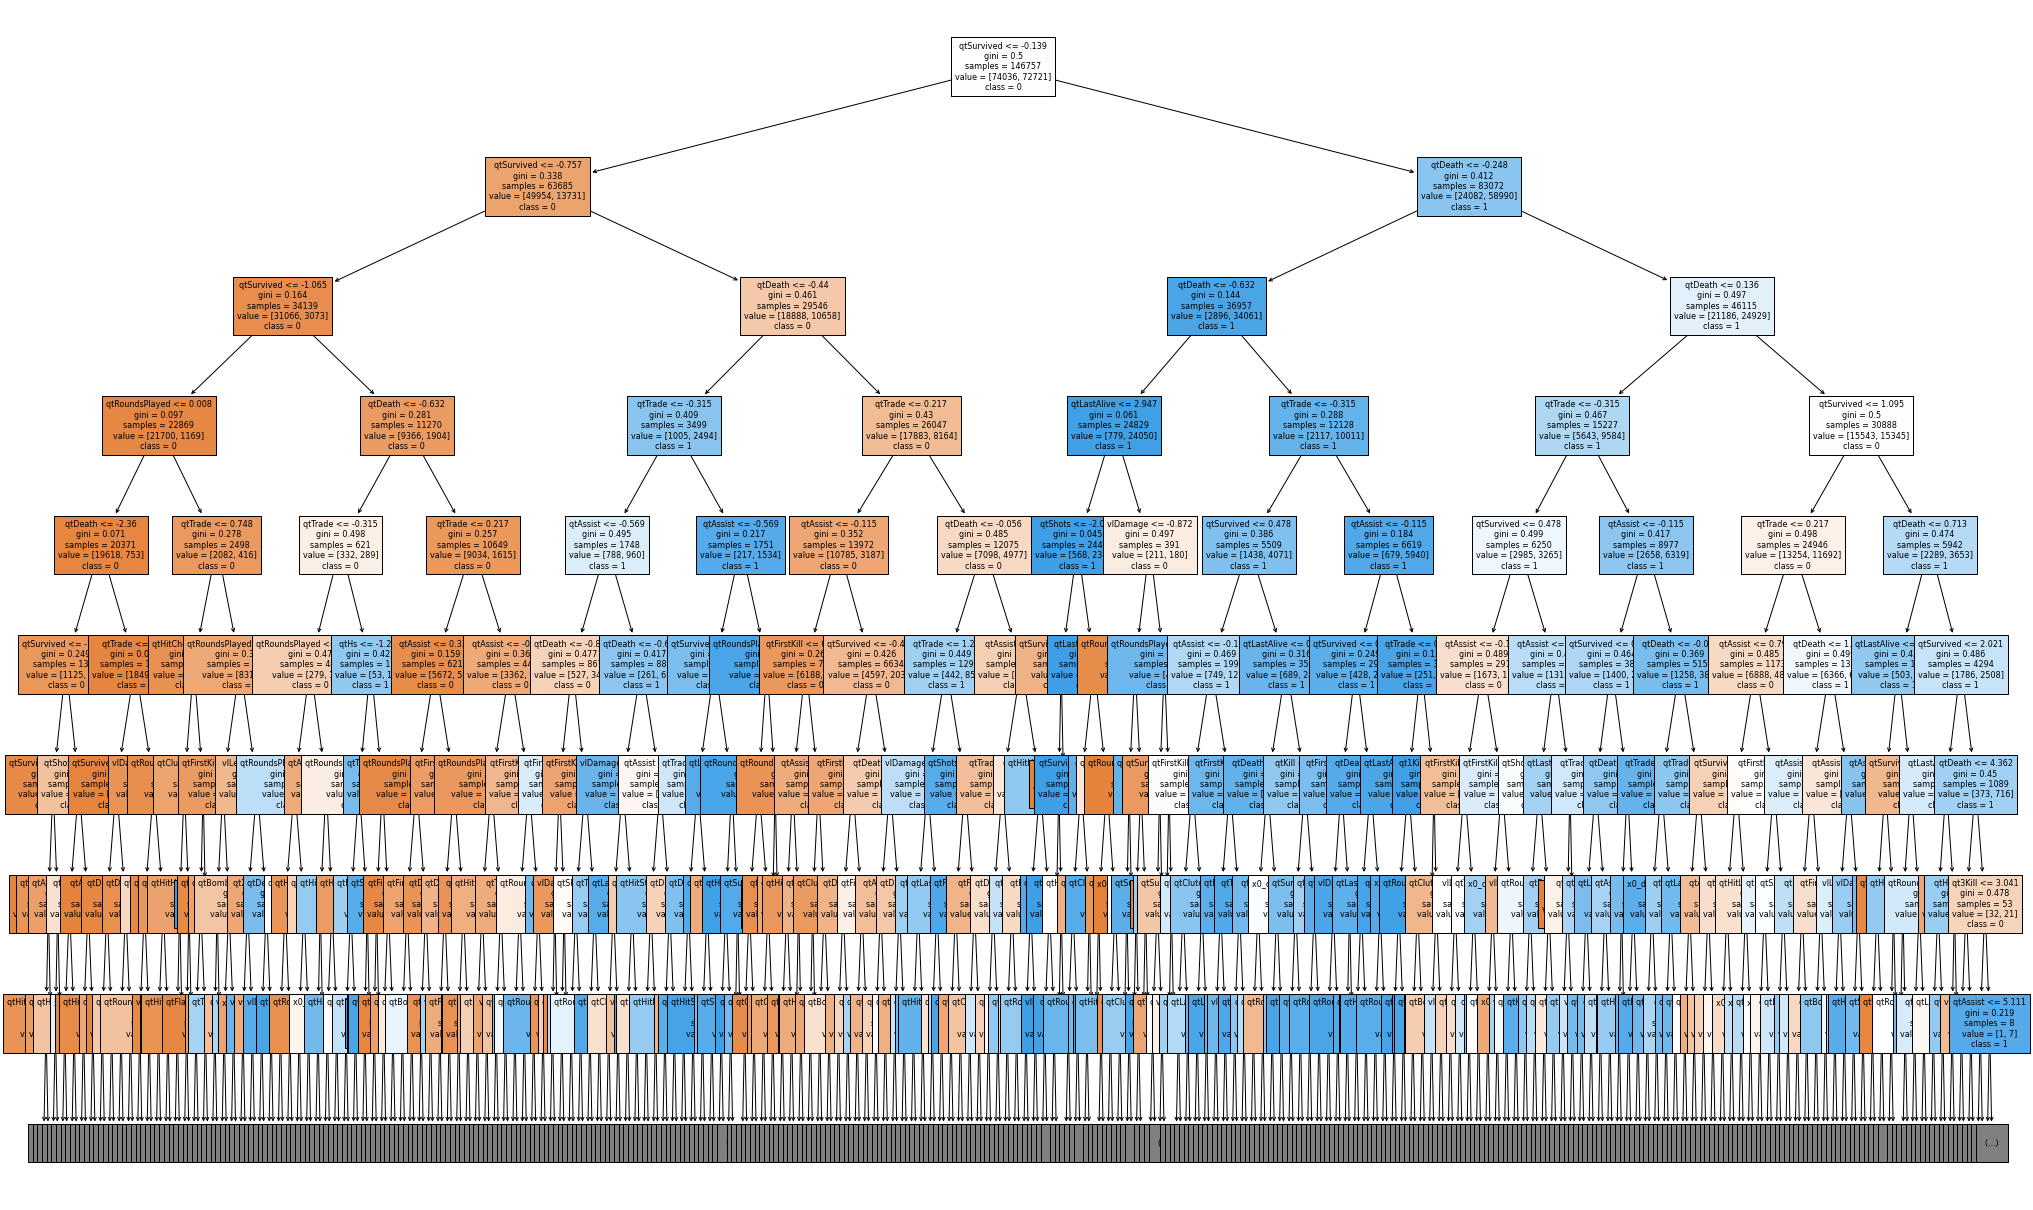

In [14]:
plt.figure(figsize=(35,22))
plot_tree(decision_tree_pipe.named_steps['decisiontreeclassifier'],
          feature_names= list(num_features) + categorical_features,
          fontsize=8,
          filled=True,
          class_names=['0','1'],
          max_depth=8)
plt.show()

**1.8: Prune the tree using one of the techniques discussed in class and evaluate the performance**

In [15]:
clf = decision_tree_pipe.named_steps['decisiontreeclassifier']
path = clf.cost_complexity_pruning_path(decision_tree_pipe[0].transform(cs_go_X_dev), cs_go_y_dev)
alphas = path['ccp_alphas']

ccp_alphas = alphas[-11:-1]
pipe_decision_tree_pruned = make_pipeline(preprocess,
                                          GridSearchCV(clf,
                                                       param_grid = [{"ccp_alpha": ccp_alphas}],
                                                       return_train_score=True),
                                          verbose=True)
  
pipe_decision_tree_pruned.fit(cs_go_X_dev, cs_go_y_dev)
grid_search_results_pruned = pipe_decision_tree_pruned.named_steps['gridsearchcv']

print("Best train score: ", grid_search_results_pruned.best_score_)
print("Best train alpha: ", grid_search_results_pruned.best_params_)
print("Test score: ", pipe_decision_tree_pruned.score(cs_go_X_test, cs_go_y_test))

[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.1s
[Pipeline] ...... (step 2 of 2) Processing gridsearchcv, total= 1.5min
Best train score:  0.7590643435322659
Best train alpha:  {'ccp_alpha': 0.0013956580566819726}
Test score:  0.7572090487871355


**1.9: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

In [16]:
feature_names = num_features.tolist() + categorical_features

In [17]:
feat_imps = zip(feature_names, grid_search_results_pruned.best_estimator_.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))

In [18]:
print('Top 3 features:', list(feats[:3]))

Top 3 features: ['qtSurvived', 'qtDeath', 'qtTrade']


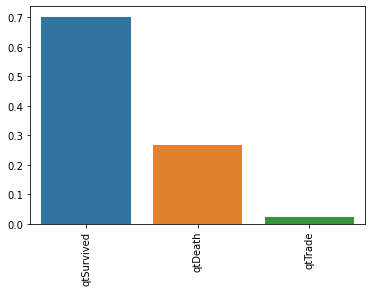

In [19]:
#Visualising
x_val = list(feats[:3])
y_val = list(imps[:3])
ax = sns.barplot(x_val, y_val)
ax.tick_params(axis='x', rotation=90)
plt.show()

**Top 3 features are 'qtSurvived', 'qtDeath', 'qtTrade'.**

If a player survives multiple rounds, the chances of the player winning are more.
If a player dies less, chances of winning are more.
qtTrade also has some significance, as trade kills during a round help in reaching the end of the game and calculating the chances of victory.

## Question 2: Random Forests

In [20]:
from sklearn.ensemble import RandomForestClassifier

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [26]:
random_forest_pipe = make_pipeline(preprocess, RandomForestClassifier())
random_forest_pipe.fit(cs_go_X_dev, cs_go_y_dev)

print("Random Forests Dev Accuracy: ", random_forest_pipe.score(cs_go_X_dev, cs_go_y_dev))
print("Random Forests Test Accuracy: ", random_forest_pipe.score(cs_go_X_test, cs_go_y_test))

Random Forests Dev Accuracy:  0.9999931860149771
Random Forests Test Accuracy:  0.7898609975470156


**Yes, random forest performs better than decision tree on the test dataset. Random forest is ensemble of decision trees, achieved with the help of bagging and hence it performs better than decision tree.**

**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [22]:
clf = random_forest_pipe['randomforestclassifier']
unpure_leaf = 0

# The scikit documentation has the below code

for clf in random_forest_pipe['randomforestclassifier'].estimators_:
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    impurity = clf.tree_.impurity

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]

    while len(stack) > 0:
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        is_split_node = children_left[node_id] != children_right[node_id]
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True
            if impurity[node_id] > 0:
                unpure_leaf += 1

print("Number of unpure leaves: ", unpure_leaf)

Number of unpure leaves:  0


**Since there was no limit to the max_depth, the random forests has been trained till all the decision trees part of the ensemble are fit completely and number of unpure leaves are zero. I have verified this using the code above.**


**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


**We have observed that there is an overfitting issue with our model, so we will pick n_estimators and max_depth. The n_estimators will help control the number of trees, enabling us to get optimal number of trees to obtain a good performance. The max_depth helps control overfitting by limiting the number of splits, hence helping us to build trees of lesser depths, which reduces training time. Optimal and balanced selection of these hyperparameters help us acheive a good performance.**

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

n_estimators: [60, 70, 80, 90, 100]

max_depth: [6, 8, 10, 12, 14]

**Based on the default parameter values and the given model, the hyperparameter have been chosen such that we have values that assist us in making sure the search space is adequately searched. Training time has also been kept in mind while choosing the values**

**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [23]:
rf_param_grid = {"n_estimators": [60, 70, 80, 90, 100], "max_depth": [6, 8, 10, 12, 14]}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_param_grid)
grid_search_rf.fit(preprocess.transform(cs_go_X_dev), cs_go_y_dev)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12, 14],
                         'n_estimators': [60, 70, 80, 90, 100]})

In [24]:
print("Random Forest Dev Set Accuracy: ", grid_search_rf.score(preprocess.transform(cs_go_X_dev), cs_go_y_dev))
print("Random Forest Test Set Accuracy: ", grid_search_rf.score(preprocess.transform(cs_go_X_test), cs_go_y_test))
print("Best Params: ", grid_search_rf.best_params_)

Random Forest Dev Set Accuracy:  0.8676383409309266
Random Forest Test Set Accuracy:  0.7916598528209321
Best Params:  {'max_depth': 14, 'n_estimators': 90}


**The initial random forest in 2.1 was trained till purity. We observed that there was a big difference between the development and test accuracy and the development accuracy was close to 1, which indicates the model was overfitting.**
**We have taken several hyperparameters now and used grid search to get the best params and we have observed that the test accuracy is better than the random forest in 2.1 and a more optimized fitting of the model is taking place.**

**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

In [29]:
rf_feat_imps = zip(feature_names, grid_search_rf.best_estimator_.feature_importances_)
rf_feats, rf_imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, rf_feat_imps)), key=lambda x: x[1], reverse=True)))

Top 3 features: ['qtSurvived', 'qtDeath', 'qtRoundsPlayed']


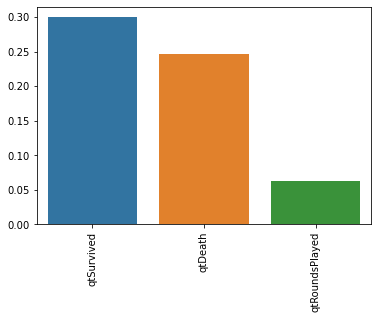

In [30]:
print('Top 3 features:', list(rf_feats[:3]))

ax = sns.barplot(list(rf_feats[:3]), list(rf_imps[:3]))
ax.tick_params(axis='x', rotation=90)

**Top 3 features are 'qtSurvived', 'qtDeath', 'qtRoundsPlayed'.**

If a player survives multiple rounds, the chances of the player winning are more.
If a player dies less, chances of winning are more.
qtRoundsPlayed also has some significance. As a player plays more round, there is a higher chance that the player has gotten better at the game.

In 1.9, the 3rd most important feature was 'qtTrade'. This set of features make more sense intuively on comparision to 1.9. The test accuracy is higher for Random Forests as well.

## Question 3: Gradient Boosted Trees

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.base import TransformerMixin
import time

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.**

In [32]:
# Gradient Boosting Classifier

gbc_params = {'n_estimators': [100, 150],
          'learning_rate': [0.01, 0.1],
          'max_depth': [8, 10]}

pipe_gbc = make_pipeline(preprocess, GridSearchCV(GradientBoostingClassifier(random_state=42), 
                                                  param_grid=gbc_params,
                                                  cv=5),
                         verbose=True)

# start timer for model selection
start = time.time()
pipe_gbc.fit(cs_go_X_dev, cs_go_y_dev)
end = time.time()

mins = (end - start)//60
sec = (end - start)%60
print(f'GBC Model Selection Time Taken: {mins:.0f}m {sec:.0f}s')

[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.1s
[Pipeline] ...... (step 2 of 2) Processing gridsearchcv, total=59.4min
GBC Model Selection Time Taken: 59m 22s


In [33]:
grid_search_results_gbc = pipe_gbc.named_steps['gridsearchcv']

print("Best Score: ", grid_search_results_gbc.best_score_)
print("Best Params: ", grid_search_results_gbc.best_params_)

print("Test set score: ", pipe_gbc.score(cs_go_X_test,cs_go_y_test))

Best Score:  0.7978358804826339
Best Params:  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
Test set score:  0.8017715998909785


In [34]:
# Hist Gradient Boosting Classifier

hgbc_params = {'max_iter': [100, 150],
          'learning_rate': [0.01, 0.1],
          'max_depth': [8, 10]}

pipe_hgbc = make_pipeline(preprocess,
                          GridSearchCV(HistGradientBoostingClassifier(random_state=42),
                                       param_grid=hgbc_params,
                                       cv=5),
                          verbose=True)

# start timer for model selection
start = time.time()
pipe_hgbc.fit(cs_go_X_dev, cs_go_y_dev)
end = time.time()

mins = (end - start)//60
sec = (end - start)%60
print(f'HGBC Model selection Time Taken: {mins:.0f}m {sec:.0f}s')

[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.1s
[Pipeline] ...... (step 2 of 2) Processing gridsearchcv, total= 1.9min
HGBC Model selection Time Taken: 1m 52s


In [35]:
grid_search_results_hgbc = pipe_hgbc.named_steps['gridsearchcv']

print("Best Score: ", grid_search_results_hgbc.best_score_)
print("Best Params: ", grid_search_results_hgbc.best_params_)
print("Test set score: ", pipe_hgbc.score(cs_go_X_test,cs_go_y_test))

Best Score:  0.8007590911086135
Best Params:  {'learning_rate': 0.1, 'max_depth': 10, 'max_iter': 150}
Test set score:  0.8026982829108749


**GradientBoosting took almost an hour to run and gave a test score of 0.801 whereas Hist Gradient Boosting Classifier took about 2 mins to run and gave a test score of 0.802.**

**3.2: Train an XGBoost model by tuning 3 hyperparameters using 5 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [36]:
from xgboost import XGBClassifier

xgbc_params = {'n_estimators': [100, 150],
          'learning_rate': [.01, 0.1],
          'max_depth': [4, 6]}

start_time = time.time()
pipe_xgb = make_pipeline(preprocess, GridSearchCV(XGBClassifier(random_state=42),
                                                    param_grid = xgbc_params,
                                                  cv=5),
                         verbose=True)

# start timer for model selection
start = time.time()
pipe_xgb.fit(cs_go_X_dev, cs_go_y_dev)
end = time.time()

mins = (end - start)//60
sec = (end - start)%60
print(f'XGBoost Model selection Time Taken: {mins:.0f}m {sec:.0f}s')

[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.1s
[22:41:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:41:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to rest

[22:43:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:00] WARNING: /Users/runner/miniforge3/cond

In [37]:
grid_search_results_xgb = pipe_xgb.named_steps['gridsearchcv']


print("Best Score: ", grid_search_results_xgb.best_score_)
print("Best Params: ", grid_search_results_xgb.best_params_)
print("Test set score: ", pipe_xgb.score(cs_go_X_test,cs_go_y_test))

Best Score:  0.8010452772724715
Best Params:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}
Test set score:  0.8031343690378849


**On comparision with Gradient Boosting (Test Acc: 0.8017) and Hist Gradient Boosting Classifier (Test Acc: 0.8026) in 3.1, XGBoost is exhibiting a slight improvement in performance on the test data (Test Acc: 0.8031).**

**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

Test accuracies of models:

Decision Tree - 0.7226

Random Forests - 0.7898

Gradient Boosting -  0.8017

Hist Gradient Boosting Classifier - 0.8026

XGBoost - 0.8031

**XGBoost, Hist Gradient Boosting Classifier, Gradient Boosting have very close test accuracies, but perform significantly better than the decision trees and random forests. In the boosting techniques, the weak learners are learned sequentially with early learners fitting simple models to the data and then analysing data for errors. When an input is misclassified by one tree, its output is adjusted so that next tree is more likely to learn it
correctly.**

**I would choose XGBoost out of these given models, as it has given the highest test accuracy and supports fast approximate split finding based on histograms.**

**3.4: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

In [38]:
feat_imps_xgb = zip(feature_names, grid_search_results_xgb.best_estimator_.feature_importances_)
feats_xgb, imps_xgb = zip(*(sorted(list(filter(lambda x: x[1] != 0 , feat_imps_xgb)), key= lambda x: x[1], reverse=True)))

print('Top 3 features are:', list(feats_xgb[:3]))

Top 3 features are: ['qtSurvived', 'qtDeath', 'qtTrade']


**The top 3 features for the XGBoost model are: 'qtSurvived', 'qtDeath', 'qtTrade'**

It's the same as Decision Trees, but Random forests had qtRoundsPlayed instead of qtTrade as the third most important feature. 

We can hence infer that the top 2 features 'qtSurvived' and 'qtDeath' are definitely the most important to the model and we can trust them the most. They have high values as compared to other columns for all the models. Intuitively as well, they make the most sense.

**3.5: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [39]:
top_7_feats = list(feats_xgb[:7])
top_7_feats

['qtSurvived',
 'qtDeath',
 'qtTrade',
 'qtAssist',
 'qtLastAlive',
 'qtFirstKill',
 'qtClutchWon']

In [41]:
xgbc_best_params = {'n_estimators': [50, 100],
          'learning_rate': [0.01, 0.1],
          'max_depth': [8, 10]}

preprocessor_xgb_best = make_column_transformer((StandardScaler(),
                                                 list(cs_go_X_dev[top_7_feats].columns)),
                                                remainder='passthrough')

pipe_xgb_best = make_pipeline(preprocessor_xgb_best, GridSearchCV(XGBClassifier(random_state=42),
                                               param_grid = xgbc_best_params, cv=5),
                              verbose=True)

pipe_xgb_best.fit(cs_go_X_dev[top_7_feats], cs_go_y_dev)

[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.0s
[22:47:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to rest

[22:49:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:08] WARNING: /Users/runner/miniforge3/cond

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['qtSurvived', 'qtDeath',
                                                   'qtTrade', 'qtAssist',
                                                   'qtLastAlive', 'qtFirstKill',
                                                   'qtClutchWon'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=Non...
                                                      min_child_weight=None,
                       

In [43]:
print('Development Set Score:', pipe_xgb_best.score(cs_go_X_dev[top_7_feats], cs_go_y_dev))
print("Test set score: ", pipe_xgb_best.score(cs_go_X_test[top_7_feats],cs_go_y_test))

Development Set Score: 0.8125200160810047
Test set score:  0.7999727446170619


**This model performs worse than the XGBoost Model in 3.2. Here we have only considered the top 7 features, hence the model has lost some essential information from the remaining features, as these columns were not considered during training.**

## Question 4: Calibration

In [45]:
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [46]:
y_prob = pipe_xgb.predict_proba(cs_go_X_test)[:, 1]
brier_score_loss(cs_go_y_test, y_prob)

0.12879690362301224

**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

In [49]:
cs_go_X_train, cs_go_X_calib, cs_go_y_train, cs_go_y_calib = train_test_split(cs_go_X_dev, cs_go_y_dev, test_size=0.2,random_state=42)

In [50]:
xgbc_params2 = {'n_estimators': [100, 150],
          'learning_rate': [.01, 0.1],
          'max_depth': [4, 6]}

start_time = time.time()
pipe_xgb2 = make_pipeline(preprocess, GridSearchCV(XGBClassifier(random_state=42),
                                                    param_grid = xgbc_params2,
                                                  cv=5),
                         verbose=True)

pipe_xgb2.fit(cs_go_X_train, cs_go_y_train)

[Pipeline] . (step 1 of 2) Processing columntransformer, total=   0.1s
[22:52:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to rest

[22:54:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:36] WARNING: /Users/runner/miniforge3/cond

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  array(['qtKill', 'qtAssist', 'qtDeath', 'qtHs', 'qtBombeDefuse',
       'qtBombePlant', 'qtTk', 'qtTkAssist', 'qt1Kill', 'qt2Kill',
       'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill', 'qtFirstKill',
       'vlDamage', 'qtHits', 'qtShots', 'qtLastAlive', 'qtClutchWon',
       'qtRoundsPlayed'...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                    

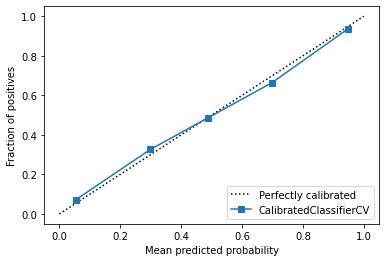

In [53]:
cal_xgb_iso = CalibratedClassifierCV(pipe_xgb[1], cv='prefit', method='isotonic')
pipe_xgb_iso = make_pipeline(preprocess,cal_xgb_iso)
pipe_xgb_iso.fit(X_calib, y_calib)

disp = CalibrationDisplay.from_estimator(pipe_xgb_iso[1], preprocess.transform(cs_go_X_test), cs_go_y_test)
plt.show()

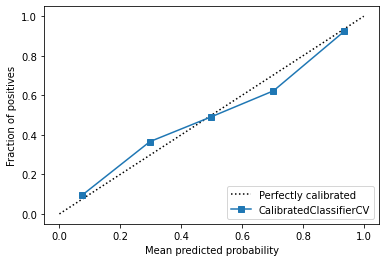

In [54]:
cal_xgb_platt = CalibratedClassifierCV(pipe_xgb[1], cv='prefit', method='sigmoid')
pipe_xgb_platt = make_pipeline(preprocess,cal_xgb_platt)
pipe_xgb_platt.fit(X_calib, y_calib)

disp = CalibrationDisplay.from_estimator(pipe_xgb_platt[1], preprocess.transform(cs_go_X_test), cs_go_y_test)
plt.show()

**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [57]:
prob_pos_platt = pipe_xgb_platt.predict_proba(cs_go_X_test)[:, 1]
print('Brier Scores for Platt Calibration:', brier_score_loss(cs_go_y_test, prob_pos_platt))

Brier Scores for Platt Calibration: 0.13176720294415661


In [58]:
prob_pos_isotonic = pipe_xgb_iso.predict_proba(cs_go_X_test)[:, 1]
print('Brier Scores for Isotonic Calibration:', brier_score_loss(cs_go_y_test, prob_pos_isotonic))

Brier Scores for Isotonic Calibration: 0.12932358066060132


**The calibration methods (Isotonic and Platt Calibration) in this case have slightly increased the brier scores. Here, hence we can see the calibration techniques have not helped in getting better predicted probabilities.**